In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
from dypac_utils import load_dypac, load_r2

In [2]:
subject = 'sub-03'
fwhm = '5'
cluster = 300
state = 900
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202011/'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)

In [3]:
model.components_.shape

(900, 131750)

# Interactive viewer

/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



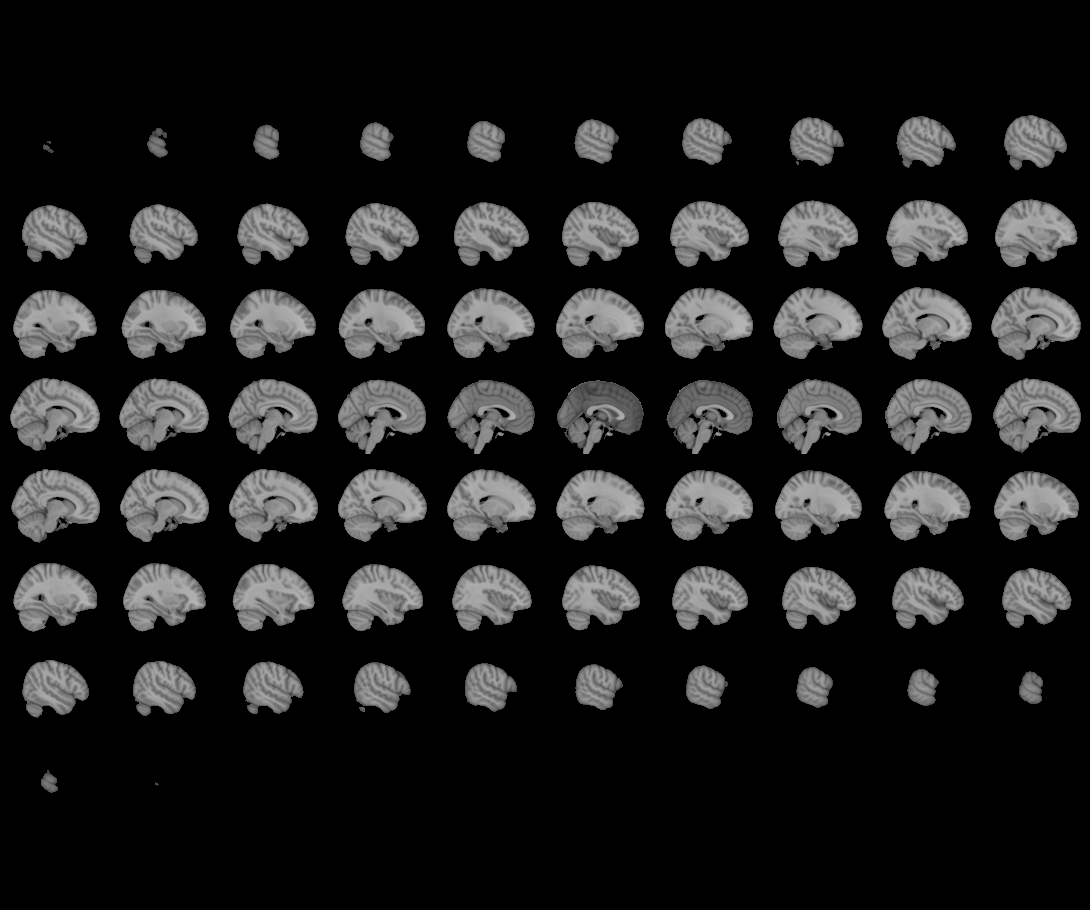
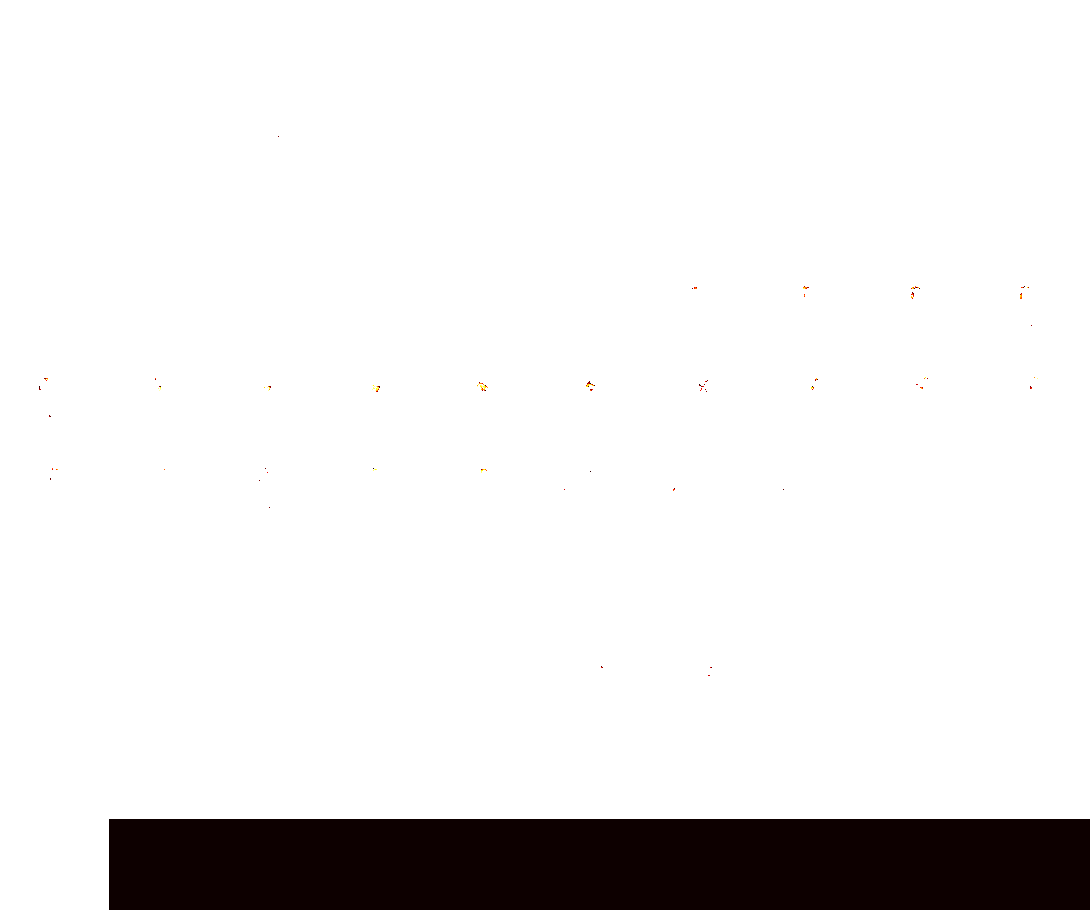

In [14]:
num_comp = 800
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

# Slice viewer

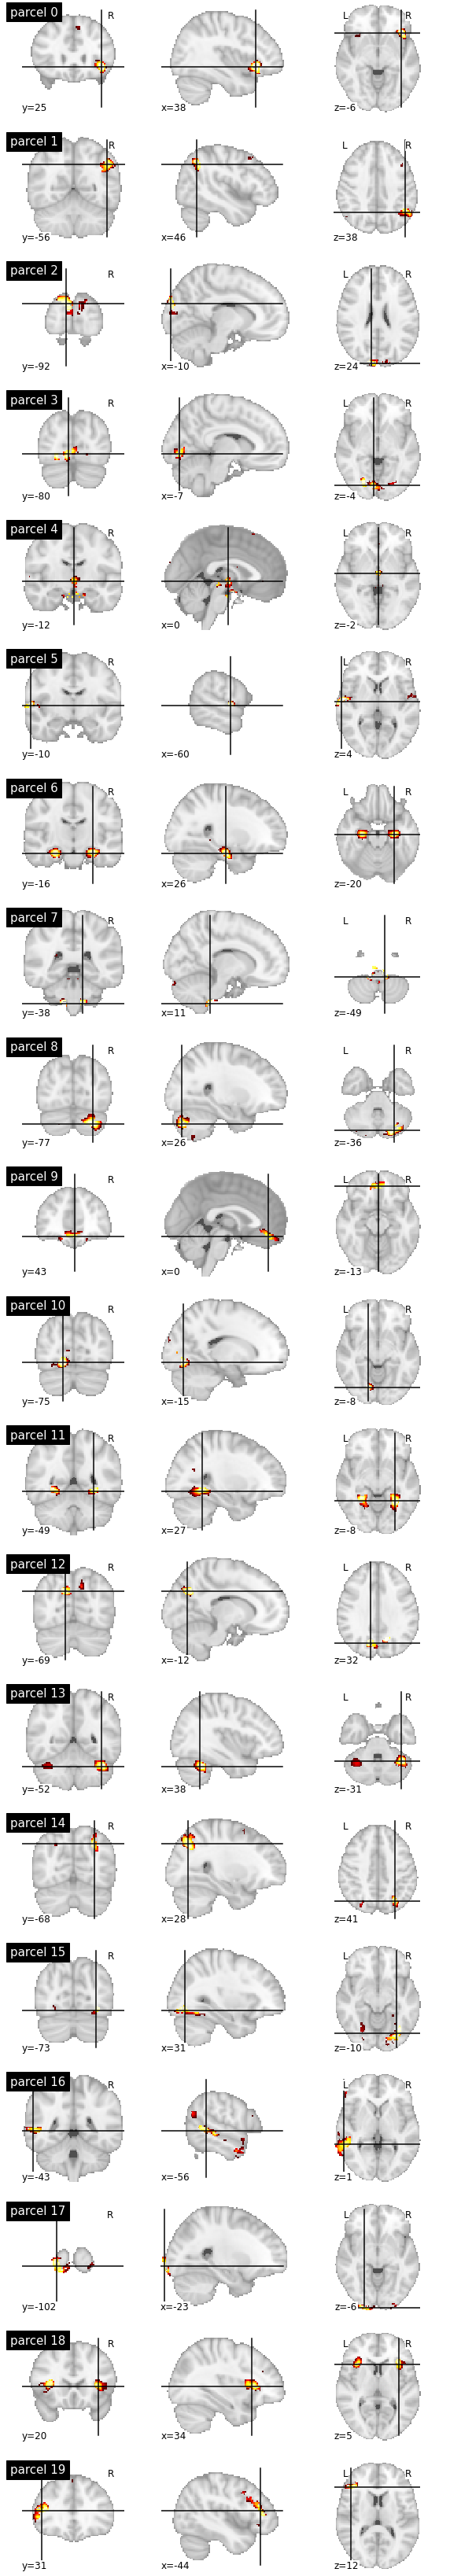

In [10]:
from nilearn.plotting import plot_stat_map
n_comp = 20
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))

for num_comp in range(0, n_comp):
    comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
    plotting.plot_stat_map(comp, display_mode='ortho', axes=plt.subplot(n_comp, 1, num_comp + 1), threshold=0.1, vmax=1, title=f"parcel {num_comp}", colorbar=False)